Calculo de distancias


In [32]:
import math
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cityblock, euclidean
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cityblock, euclidean
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



In [2]:
def distancia_euclidean(x1,y1,x2,y2):
  return math.sqrt((x2-x1)**2+(y2-y1)**2)


In [3]:
def distancia_manhattan(x1, y1, x2, y2):
    return abs(x2 - x1) + abs(y2 - y1)

In [4]:
def distancia_jaccard(conjunto1, conjunto2):
    interseccion = len(conjunto1 & conjunto2)
    union = len(conjunto1 | conjunto2)
    return 1 - interseccion / union


In [5]:
def hamming_distance(str1, str2):
    if len(str1) != len(str2):
        raise ValueError("Las cadenas deben tener la misma longitud")
    return sum(c1 != c2 for c1, c2 in zip(str1, str2))

In [10]:
def chebyshev_distance(point1, point2):
    return max(abs(point2[0] - point1[0]), abs(point2[1] - point1[1]))

In [12]:
def canberra_distance(point1, point2):
    if len(point1) != len(point2):
        raise ValueError("Los puntos deben tener la misma dimensión")

    distance = 0
    for p1, p2 in zip(point1, point2):
        if p1 == 0 and p2 == 0:
            continue
        distance += abs(p1 - p2) / (abs(p1) + abs(p2))
    return distance

In [14]:
def cosine_similarity(vector1, vector2):
    if len(vector1) != len(vector2):
        raise ValueError("Los vectores deben tener la misma dimensión")

    dot_product = sum(a * b for a, b in zip(vector1, vector2))
    norm_vector1 = math.sqrt(sum(a * a for a in vector1))
    norm_vector2 = math.sqrt(sum(b * b for b in vector2))

    if norm_vector1 == 0 or norm_vector2 == 0:
        raise ValueError("Los vectores no deben ser nulos")

    return dot_product / (norm_vector1 * norm_vector2)

def cosine_distance(vector1, vector2):
    return 1 - cosine_similarity(vector1, vector2)


In [6]:
print("Coordendas x, y (Separa)")
x1,y1=map(int,input().split())
x2,y2=map(int,input().split())


Coordendas x, y (Separa)
1 2
3 4


In [15]:
print(distancia_euclidean(x1,y1,x2,y2))
print(distancia_manhattan(x1,y1,x2,y2))
print(distancia_jaccard({x1,y1},{x2,y2}))
print(hamming_distance(str(x1),str(x2)))
print(chebyshev_distance((x1,y1),(x2,y2)))
print(canberra_distance((x1,y1),(x2,y2)))
print(cosine_similarity((x1,y1),(x2,y2)))
print(cosine_distance((x1,y1),(x2,y2)))

2.8284271247461903
4
1.0
1
2
0.8333333333333333
0.9838699100999074
0.01613008990009257


In [16]:
import pandas as pd
from sklearn.datasets import load_iris

In [17]:
iris = load_iris()

In [18]:
# Crear un DataFrame de pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

# Mostrar las primeras filas del DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  


In [27]:
# Crear un DataFrame de pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].apply(lambda x: iris.target_names[x])


In [28]:
# Calcular el promedio de cada característica para cada especie
average_measures = df.groupby('species').mean()

# Mostrar los promedios
print(average_measures)

            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


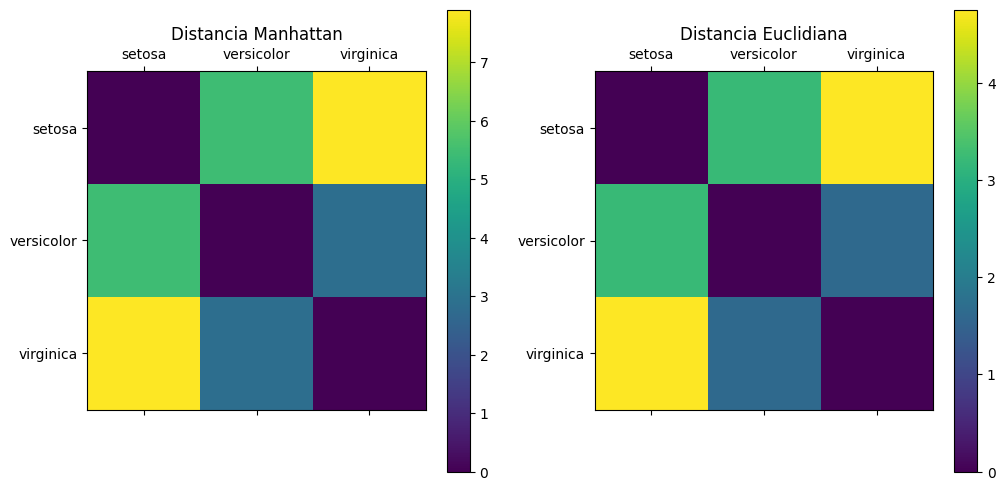

Distancias Manhattan:
 [[0.    5.466 7.906]
 [5.466 0.    2.848]
 [7.906 2.848 0.   ]]
Distancias Euclidianas:
 [[0.         3.20828116 4.75450734]
 [3.20828116 0.         1.62048882]
 [4.75450734 1.62048882 0.        ]]


In [29]:

# Calcular el promedio de cada característica para cada especie
average_measures = df.groupby('species').mean()

# Obtener los nombres de las especies
species = average_measures.index

# Inicializar matrices para las distancias Manhattan y Euclidianas
manhattan_distances = np.zeros((3, 3))
euclidean_distances = np.zeros((3, 3))

# Calcular las distancias Manhattan y Euclidiana entre cada par de promedios
for i in range(3):
    for j in range(3):
        manhattan_distances[i, j] = cityblock(average_measures.iloc[i], average_measures.iloc[j])
        euclidean_distances[i, j] = euclidean(average_measures.iloc[i], average_measures.iloc[j])

# Crear una figura para las matrices de distancia
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Graficar la matriz de distancias Manhattan
cax1 = ax[0].matshow(manhattan_distances, cmap='viridis')
fig.colorbar(cax1, ax=ax[0])
ax[0].set_xticks(np.arange(len(species)))
ax[0].set_yticks(np.arange(len(species)))
ax[0].set_xticklabels(species)
ax[0].set_yticklabels(species)
ax[0].set_title('Distancia Manhattan')

# Graficar la matriz de distancias Euclidianas
cax2 = ax[1].matshow(euclidean_distances, cmap='viridis')
fig.colorbar(cax2, ax=ax[1])
ax[1].set_xticks(np.arange(len(species)))
ax[1].set_yticks(np.arange(len(species)))
ax[1].set_xticklabels(species)
ax[1].set_yticklabels(species)
ax[1].set_title('Distancia Euclidiana')

plt.show()

# Mostrar las matrices de distancia
print("Distancias Manhattan:\n", manhattan_distances)
print("Distancias Euclidianas:\n", euclidean_distances)


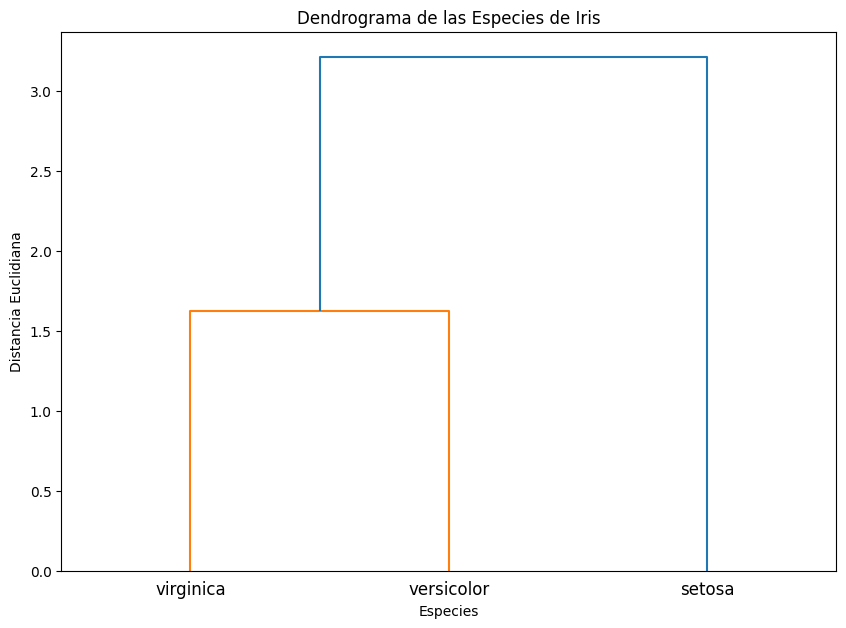

In [30]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


# Calcular el promedio de cada característica para cada especie
average_measures = df.groupby('species').mean()

# Realizar el agrupamiento jerárquico utilizando la distancia euclidiana
linked = linkage(average_measures, 'single')

# Crear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=average_measures.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma de las Especies de Iris')
plt.xlabel('Especies')
plt.ylabel('Distancia Euclidiana')
plt.show()


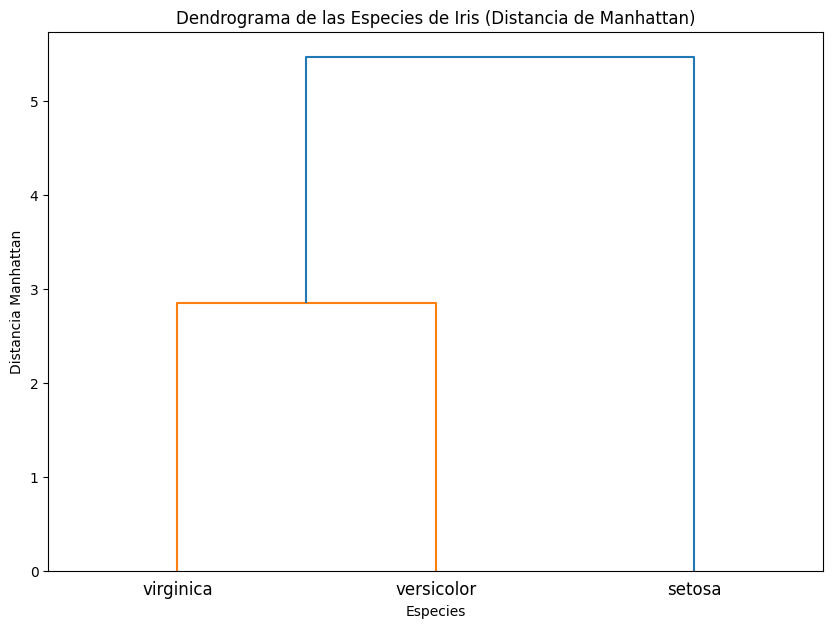

In [54]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Cargar el conjunto de datos Iris desde scikit-learn
iris = load_iris()

# Crear un DataFrame de pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].apply(lambda x: iris.target_names[x])

# Calcular el promedio de cada característica para cada especie
average_measures = df.groupby('species').mean()

# Realizar el agrupamiento jerárquico utilizando la distancia de Manhattan (cityblock)
linked_manhattan = linkage(average_measures, method='single', metric='cityblock')

# Crear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked_manhattan,
           orientation='top',
           labels=average_measures.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma de las Especies de Iris (Distancia de Manhattan)')
plt.xlabel('Especies')
plt.ylabel('Distancia Manhattan')
plt.show()




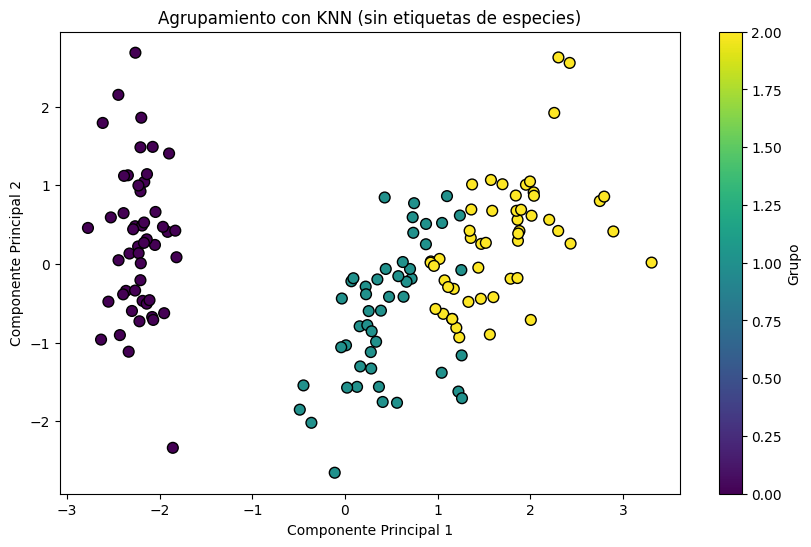

In [33]:
# Crear un DataFrame de pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Estandarizar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Aplicar PCA para reducir la dimensionalidad y facilitar la visualización
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Aplicar KNN para agrupamiento y clasificación
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(principal_components, iris.target)

# Predecir las etiquetas de clase (grupos) para cada punto de datos
predicted_labels = knn.predict(principal_components)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=predicted_labels, cmap='viridis', edgecolor='k', s=60)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Agrupamiento con KNN (sin etiquetas de especies)')
plt.colorbar(label='Grupo')
plt.show()

In [36]:
print(predicted_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [49]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [50]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris desde scikit-learn
iris = load_iris()

# Estandarizar los datos para KNN
scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris.data)

# Entrenar KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaled_features, iris.target)

# Predecir las etiquetas de clase
predicted_labels = knn.predict(scaled_features)

# Calcular la precisión
accuracy = accuracy_score(iris.target, predicted_labels)

print(f"Precisión de KNN en el conjunto de datos Iris: {accuracy:.4f}")


Precisión de KNN en el conjunto de datos Iris: 0.9533


In [51]:
from sklearn.metrics import f1_score

# Calcular la puntuación F1
f1 = f1_score(iris.target, predicted_labels, average='weighted')

print(f"Puntuación F1 de KNN en el conjunto de datos Iris: {f1:.4f}")


Puntuación F1 de KNN en el conjunto de datos Iris: 0.9533
